
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [81]:
# a)
import pandas as pd
import numpy as np

living_city = pd.DataFrame({
    "Kommun": np.array(("Malmö", "Stockholm", "Uppsala", "Göteborg")),
    "Population": np.array((347949, 975551, 233839, 583056))},
    index = [0,1,2,3])
living_city


Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056

In [82]:
# b)
living_city.loc[[3]]

Kommun  Population
3  Göteborg      583056

In [83]:
# c)
living_city_sorted = living_city.sort_values(by="Population", ascending=False).reset_index(drop=True)
living_city_sorted

Kommun  Population
0  Stockholm      975551
1   Göteborg      583056
2      Malmö      347949
3    Uppsala      233839

In [84]:
# d)
living_city_sorted.iloc[:3]

Kommun  Population
0  Stockholm      975551
1   Göteborg      583056
2      Malmö      347949

In [85]:
# e)
living_city_sorted["Population (%)"] = (living_city_sorted["Population"]/10379295 * 100).round(1)
living_city_sorted

Kommun  Population  Population (%)
0  Stockholm      975551             9.4
1   Göteborg      583056             5.6
2      Malmö      347949             3.4
3    Uppsala      233839             2.3

---

## 2. Cities in Sweden - real dataset (*)

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


In [86]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn

sf = pd.ExcelFile("../Data/komtopp50_2020.xlsx")
print(sf.sheet_names)

df = pd.read_excel("../Data/komtopp50_2020.xlsx", header=0, sheet_name="Totalt")

# a)
print(df.head())
print(df.info())
df.describe()

['Topp 50', 'Totalt', 'Kvinnor', 'Män']
                                          Unnamed: 0  Unnamed: 1 Unnamed: 2  \
0                                                NaN         NaN        NaN   
1  Folkmängd per kommun 31 december 2020 jämfört ...         NaN        NaN   
2  Sorterat i alfabetisk ordning. Rangordning frå...         NaN        NaN   
3                                                NaN         NaN        NaN   
4                                               Rang         NaN     Kommun   

              Unnamed: 3  Unnamed: 4  Unnamed: 5  
0                    NaN         NaN         NaN  
1                    NaN         NaN         NaN  
2                    NaN         NaN         NaN  
3                    NaN         NaN         NaN  
4  Folkmängd 31 december         NaN  Förändring  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -

Unnamed: 1     Unnamed: 4
count   291.000000     291.000000
mean    151.934708   35496.934708
std     138.092769   74190.464321
min       1.000000    2019.000000
25%      73.500000   10005.000000
50%     146.000000   15940.000000
75%     218.500000   35649.500000
max    2019.000000  974073.000000

In [87]:
# b)

df = df.rename({df.columns[0] : df.iloc[4, 0] +" "+ str(df.iloc[5, 0]), 
                df.columns[1] : df.iloc[4, 0] +" "+ str(df.iloc[5, 1])[:-2], 
                df.columns[2] : df.iloc[4, 2],
                df.columns[3] : df.iloc[4, 3][:10] + str(df.iloc[5, 3]),
                df.columns[4] : df.iloc[4, 3][:10] + str(df.iloc[5, 4])[:-2],
                df.columns[5] : df.iloc[4, 5][:10]}, axis="columns")



df = df.loc[6:].reset_index(drop=True)

df["Rang 2019"] = df["Rang 2019"].astype(str).str[:-2]
df["Rang 2019"] = df["Rang 2019"].astype(int)


df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(str).str[:-2]
df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(int)
df

Rang 2020  Rang 2019        Kommun Folkmängd 2020  Folkmängd 2019  \
0          83         84           Ale          31868           31402   
1          64         64      Alingsås          41602           41420   
2         123        123       Alvesta          20224           20134   
3         255        255         Aneby           6821            6848   
4         169        167        Arboga          14039           14087   
..        ...        ...           ...            ...             ...   
285        54         55     Österåker          46644           45574   
286       116        115     Östhammar          22251           22250   
287       160        159  Östra Göinge          15017           15007   
288       284        284     Överkalix           3289            3315   
289       279        279    Övertorneå           4217            4299   

    Förändring  
0     1.483982  
1     0.439401  
2     0.447005  
3    -0.394276  
4     -0.34074  
..         ...  
285    2.34783  
286   0.004494  
287   0.066636  
288  -0.784314  
289   -1.90742  

[290 rows x 6 columns]

In [88]:
# c)

df = df.sort_values(by="Folkmängd 2020", ascending=False).reset_index(drop=True)
df

Rang 2020  Rang 2019     Kommun Folkmängd 2020  Folkmängd 2019 Förändring
0           1          1  Stockholm         975551          974073   0.151734
1           2          2   Göteborg         583056          579281    0.65167
2           3          3      Malmö         347949          344166   1.099179
3           4          4    Uppsala         233839          230767   1.331213
4           5          5  Linköping         164616          163051   0.959822
..        ...        ...        ...            ...             ...        ...
285       286        286      Åsele           2805            2794   0.393701
286       287        287   Arjeplog           2718            2785  -2.405745
287       288        288    Dorotea           2498            2551  -2.077617
288       289        289    Sorsele           2442            2489  -1.888309
289       290        290   Bjurholm           2387            2408  -0.872093

[290 rows x 6 columns]

In [89]:
# d)

df_smallest_plot = df.tail()
df_smallest = df_smallest_plot.sort_values(by="Folkmängd 2020", ascending=True)
df_smallest

Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring
289       290        290  Bjurholm           2387            2408  -0.872093
288       289        289   Sorsele           2442            2489  -1.888309
287       288        288   Dorotea           2498            2551  -2.077617
286       287        287  Arjeplog           2718            2785  -2.405745
285       286        286     Åsele           2805            2794   0.393701

In [90]:
# e)
population_2019 = df["Folkmängd 2019"].sum()
print(f"The population during 2019 in top 50 counties in Sweden was {population_2019}")
population_2020 = df["Folkmängd 2020"].sum()
print(f"The population during 2020 in top 50 counties in Sweden was {population_2020}")

The population during 2019 in top 50 counties in Sweden was 10327589
The population during 2020 in top 50 counties in Sweden was 10379295


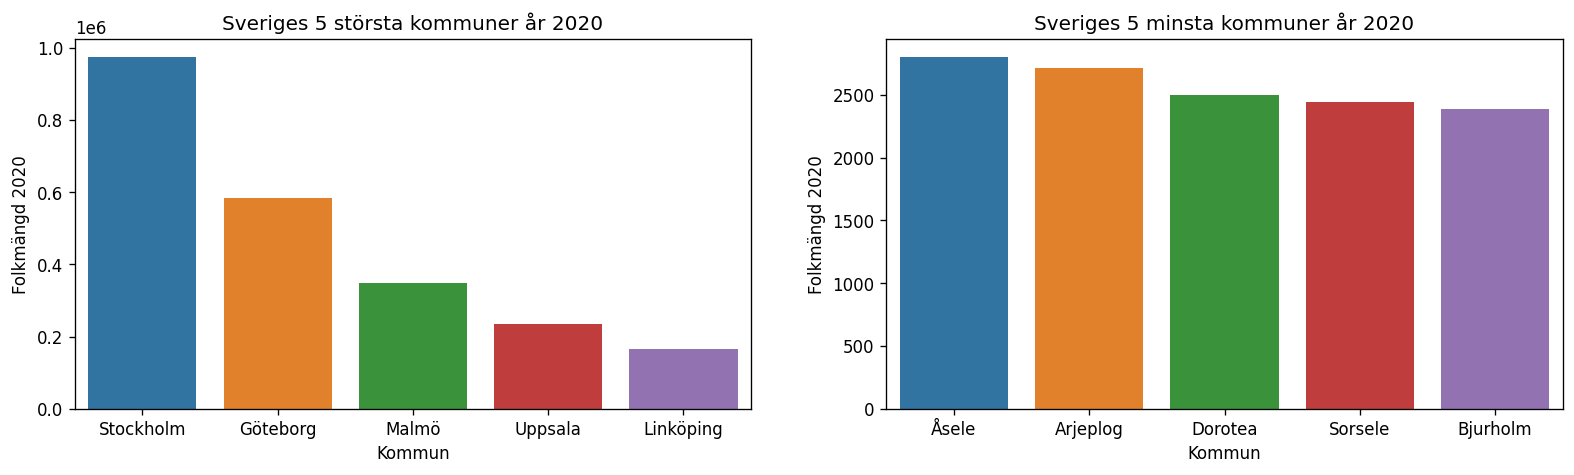

Rang 2020  Rang 2019     Kommun Folkmängd 2020  Folkmängd 2019 Förändring
0           1          1  Stockholm         975551          974073   0.151734
1           2          2   Göteborg         583056          579281    0.65167
2           3          3      Malmö         347949          344166   1.099179
3           4          4    Uppsala         233839          230767   1.331213
4           5          5  Linköping         164616          163051   0.959822
..        ...        ...        ...            ...             ...        ...
285       286        286      Åsele           2805            2794   0.393701
286       287        287   Arjeplog           2718            2785  -2.405745
287       288        288    Dorotea           2498            2551  -2.077617
288       289        289    Sorsele           2442            2489  -1.888309
289       290        290   Bjurholm           2387            2408  -0.872093

[290 rows x 6 columns]

In [91]:
# f)

df_largest = df.head()

fig, axes = plt.subplots(1,2, dpi=120, figsize=(16,4))


titles = ["Sveriges 5 största kommuner år 2020", "Sveriges 5 minsta kommuner år 2020"]
data_frames = [df_largest, df_smallest_plot]
x_column = ["Kommun","Kommun"]
y_column = ["Folkmängd 2020", "Folkmängd 2020"]


for i, (data_names, title_names) in enumerate(zip(data_frames, titles)): 
    sbn.barplot(data = data_names, x=x_column[i], y=y_column[i], ax = axes[i], hue="Kommun")
    axes[i].set(title = title_names)
    

plt.show()

df


---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


In [92]:
# a) 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn

def read_xlxs(path, sheet):
    return pd.read_excel(path, header=0, sheet_name=sheet)

def clean_xlxs(dataf):
    dataf.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
    dataf = dataf.loc[6:].reset_index(drop=True)
    dataf["Rang 2019"] = dataf["Rang 2019"].astype(str).str[:-2]
    dataf["Rang 2019"] = dataf["Rang 2019"].astype(int)
    dataf["Folkmängd 2019"] = dataf["Folkmängd 2019"].astype(str).str[:-2]
    dataf["Folkmängd 2019"] = dataf["Folkmängd 2019"].astype(int)
    return dataf
     
     
df = read_xlxs("../Data/komtopp50_2020.xlsx","Totalt")
df = clean_xlxs(df)
    
df_m = read_xlxs("../Data/komtopp50_2020.xlsx","Män")
df_m = clean_xlxs(df_m)

df_k = read_xlxs("../Data/komtopp50_2020.xlsx","Kvinnor")
df_k = clean_xlxs(df_k)

df_m["Kön"] = "Man"
df_k["Kön"] = "Kvinna"

df_m.head()




Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring  \
0        81         83       Ale          16256           16054   1.258253   
1        64         64  Alingsås          20702           20646   0.271239   
2       122        123   Alvesta          10367           10339   0.270819   
3       255        255     Aneby           3503            3498   0.142939   
4       169        168    Arboga           7094            7114  -0.281136   

   Kön  
0  Man  
1  Man  
2  Man  
3  Man  
4  Man

In [93]:
df_k.head()

Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring  \
0        84         85       Ale          15612           15348   1.720094   
1        64         64  Alingsås          20900           20774   0.606527   
2       123        123   Alvesta           9857            9795   0.632976   
3       255        255     Aneby           3318            3350  -0.955224   
4       165        164    Arboga           6945            6973  -0.401549   

      Kön  
0  Kvinna  
1  Kvinna  
2  Kvinna  
3  Kvinna  
4  Kvinna

In [94]:
# b)
def remove_rang(dataf):
    dataf = dataf.drop(columns=["Rang 2020", "Rang 2019"])
    return dataf

df_t = pd.concat([df_m, df_k])
df_t = remove_rang(df_t)

# df_t = df_t.set_index("Kommun")


df_t


Kommun Folkmängd 2020  Folkmängd 2019 Förändring     Kön
0             Ale          16256           16054   1.258253     Man
1        Alingsås          20702           20646   0.271239     Man
2         Alvesta          10367           10339   0.270819     Man
3           Aneby           3503            3498   0.142939     Man
4          Arboga           7094            7114  -0.281136     Man
..            ...            ...             ...        ...     ...
285     Österåker          22997           22442   2.473042  Kvinna
286     Östhammar          10846           10803   0.398038  Kvinna
287  Östra Göinge           7270            7262   0.110162  Kvinna
288     Överkalix           1559            1578  -1.204056  Kvinna
289    Övertorneå           2027            2065  -1.840194  Kvinna

[580 rows x 5 columns]

In [95]:
# c)

df = remove_rang(df)
df.columns = ["Kommun", "Top Pop 2020", "Top Pop 2019", "Tot förändring"]
df.head()


Kommun Top Pop 2020  Top Pop 2019 Tot förändring
0       Ale        31868         31402       1.483982
1  Alingsås        41602         41420       0.439401
2   Alvesta        20224         20134       0.447005
3     Aneby         6821          6848      -0.394276
4    Arboga        14039         14087       -0.34074

In [96]:
# d)

df = pd.merge(df_t, df)
df = df.sort_values(by="Top Pop 2020", ascending=False).reset_index(drop=True).set_index("Kommun")
df


Folkmängd 2020  Folkmängd 2019 Förändring     Kön Top Pop 2020  \
Kommun                                                                     
Stockholm         482982          482220   0.158019     Man       975551   
Stockholm         492569          491853   0.145572  Kvinna       975551   
Göteborg          292505          290308   0.756782     Man       583056   
Göteborg          290551          288973   0.546072  Kvinna       583056   
Malmö             172538          170623   1.122357     Man       347949   
...                  ...             ...        ...     ...          ...   
Dorotea             1171            1195  -2.008368  Kvinna         2498   
Sorsele             1157            1170  -1.111111  Kvinna         2442   
Sorsele             1285            1319   -2.57771     Man         2442   
Bjurholm            1154            1159  -0.431406  Kvinna         2387   
Bjurholm            1233            1249  -1.281025     Man         2387   

           Top Pop 2019 Tot förändring  
Kommun                                  
Stockholm        974073       0.151734  
Stockholm        974073       0.151734  
Göteborg         579281        0.65167  
Göteborg         579281        0.65167  
Malmö            344166       1.099179  
...                 ...            ...  
Dorotea            2551      -2.077617  
Sorsele            2489      -1.888309  
Sorsele            2489      -1.888309  
Bjurholm           2408      -0.872093  
Bjurholm           2408      -0.872093  

[580 rows x 7 columns]

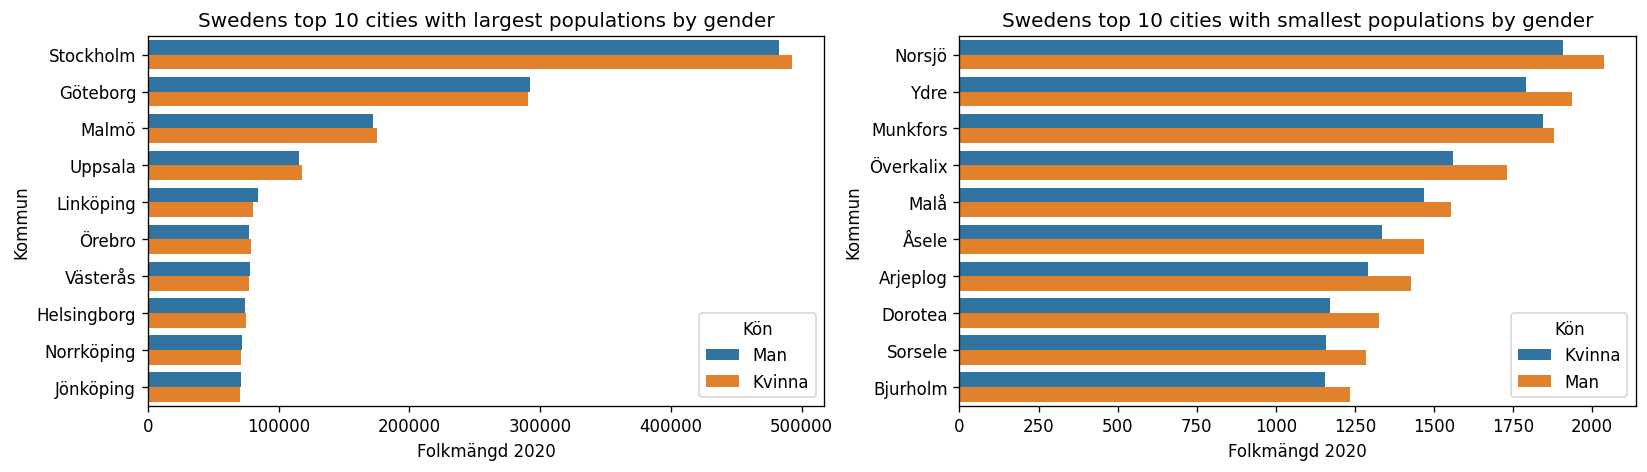

In [97]:
# e)

fig, axes = plt.subplots(1,2, dpi=120, figsize=(16,4))

df["Top Pop 2020"] = df["Top Pop 2020"].astype(int)

df_largest = df.nlargest(20, "Top Pop 2020")
df_smallest = df.nsmallest(20, "Top Pop 2020").sort_values("Top Pop 2020", ascending=False)

titles = ["Swedens top 10 cities with largest populations by gender", "Swedens top 10 cities with smallest populations by gender"]
data_frames = [df_largest, df_smallest]
x_column = ["Folkmängd 2020", "Folkmängd 2020"]
y_column = ["Kommun","Kommun"]

for i, (data_names, title_names) in enumerate(zip(data_frames, titles)): 
    sbn.barplot(data = data_names, x=x_column[i], y=y_column[i], ax = axes[i], hue="Kön")
    axes[i].set(title = title_names)

plt.show()


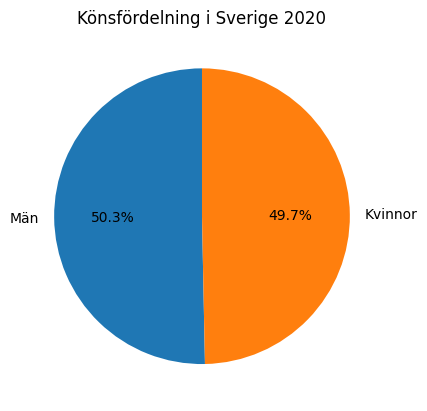

In [98]:
# f)
tot_males = df[df["Kön"]=="Man"]["Folkmängd 2020"].sum()
tot_females = df[df["Kön"]=="Kvinna"]["Folkmängd 2020"].sum()

plt.pie(x=[tot_males, tot_females], labels=["Män", "Kvinnor"], autopct="%1.1f%%", startangle=90)
plt.title("Könsfördelning i Sverige 2020")
plt.show()



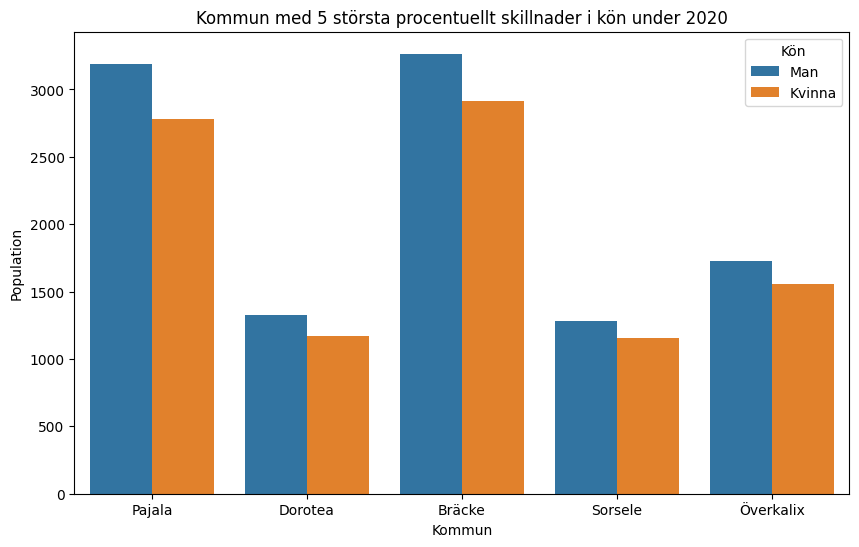

In [99]:
# g)

gender_df = df.reset_index().pivot(index="Kommun", columns="Kön", values="Folkmängd 2020")

gender_df["Total"] = gender_df["Man"] + gender_df["Kvinna"]

gender_df["Kön skillnader i procent"] = (gender_df["Man"] - gender_df["Kvinna"]) / gender_df["Total"] * 100

gender_df["Kön skillnader i procent"] = gender_df["Kön skillnader i procent"].abs()

top5_df = gender_df.sort_values("Kön skillnader i procent", ascending=False).head(5).reset_index()

top5_melted = top5_df.melt(id_vars=['Kommun'], value_vars=['Man', 'Kvinna'], var_name='Kön', value_name='Folkmängd 2020')


plt.figure(figsize=(10,6))
sbn.barplot(data=top5_melted, x="Kommun", y="Folkmängd 2020", hue="Kön")
plt.title("Kommun med 5 största procentuellt skillnader i kön under 2020")
plt.ylabel("Population")
plt.xlabel("Kommun")
plt.show()


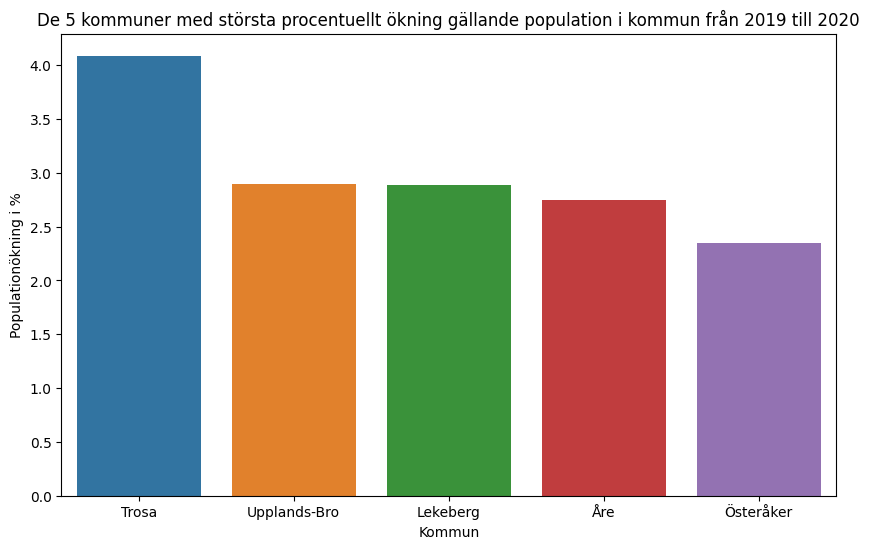

In [100]:

# h)

top5_growth = df.sort_values("Tot förändring", ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sbn.barplot(data = top5_growth, x = "Kommun", y= "Tot förändring" , hue= "Kommun")
plt.title("De 5 kommuner med största procentuellt ökning gällande population i kommun från 2019 till 2020")
plt.ylabel("Populationökning i %")
plt.xlabel('Kommun')
plt.show()

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---